# QF 627 Programming and Computational Finance
## Problem Set 1 | `Questions`

> Hi Team 👋

> As discussed, the first problem set gives you an opportunity to explore Python’s built-in functions as well as the core libraries NumPy, Pandas, and matplotlib. Let's analyze a dataset about [TED talks](https://www.ted.com/talks).

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import numpy as py
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

### <font color = "blue"> `IMPORT` your dataset: `ted.csv`. </font>

In [2]:
pd.read_csv("ted.csv")

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.t

> #### Print the imported dataframe. Each row (data points) represents a single talk (unit of observation).

In [3]:
dataset = pd.read_csv("ted.csv")
#print(dataset)

### Question 1. How would you check the number of rows and columns?

In [4]:
dataset.shape

(2550, 17)

> Note that `object columns` are usually `strings`, but can also be arbitrary Python objects such as `lists` and `dictionaries`.

> #### <font color = "red"> See **Chapter 12 and 13** of `The Coder's Apprentice` for more details. </font>

### Question 2. How would you count the number of missing values in each column?

In [5]:
dataset.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

### Question 3.1. Which talks give rise to the most online discussion? First, please sort by the number of first-level comments (though note that this is `biased in favor of older talks`).

In [6]:
sorted_dataset_comments = dataset.sort_values(by='comments',ascending =False)
#sorted_dataset_comments

#### Question 3.2. Please `correct for the bias` in favor of older talks `by calculating the number of comments per view`.

In [7]:
dataset["comments_per_view"] = dataset["comments"]/dataset["views"]
dataset_top_engaging = dataset.sort_values(by = "comments_per_view", ascending = False)
#dataset_top_engaging

> #### You will find that, for every view of the same-sex marriage talk, there are 0.002 comments.

#### Question 3.3. Please make this more interpretable by `inverting` the calculation.

In [8]:
dataset_top_engaging["inverted_comments_per_view"] = 1/dataset_top_engaging["comments_per_view"]
#dataset_top_engaging

> Please consider the `limitations` and `biases` of your data, making your results understandable (`interpretable`).

### <font color = "blue"> Let's `visualize` the distribution of comments </font>

> #### <font color = "red"> See **Chapter 4** of `Python Data Science Handbook` for a quick reference for matplotlib </font>

> #### <font color = "red"> For in-depth details, use https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html </font>

#### Question 3.4. Please create a `Line chart`, but it seems NOT useful here.

<Axes: xlabel='comments'>

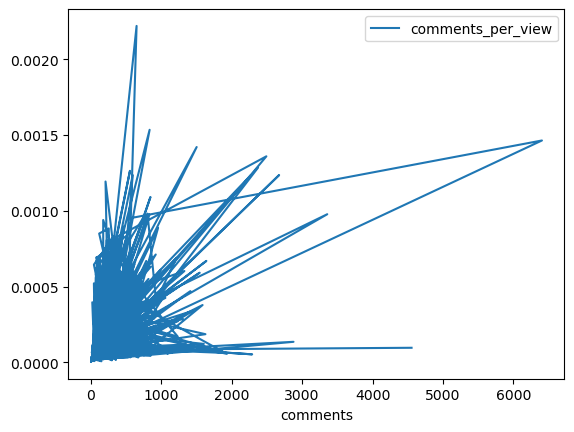

In [9]:
dataset.plot("comments","comments_per_view")

#### Question 3.5. Please create a `Histogram`--it displays the frequency distribution of a single numeric variable.

array([[<Axes: title={'center': 'comments'}>]], dtype=object)

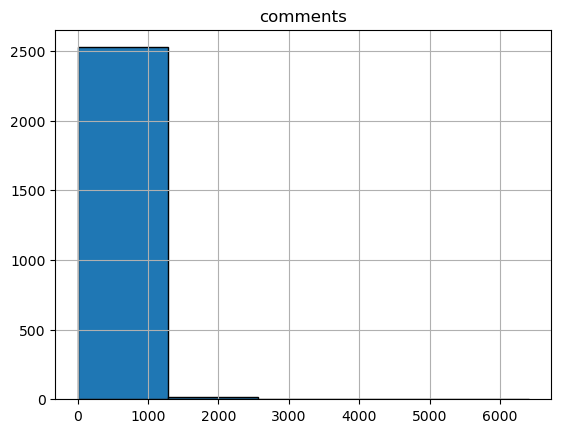

In [10]:
dataset.hist("comments", bins=5, edgecolor='black')

#### Question 3.6. Please modify the plot to be more informative by setting a cut-off for inclusion (i.e., more than 1,000 comments).

array([[<Axes: title={'center': 'comments'}>]], dtype=object)

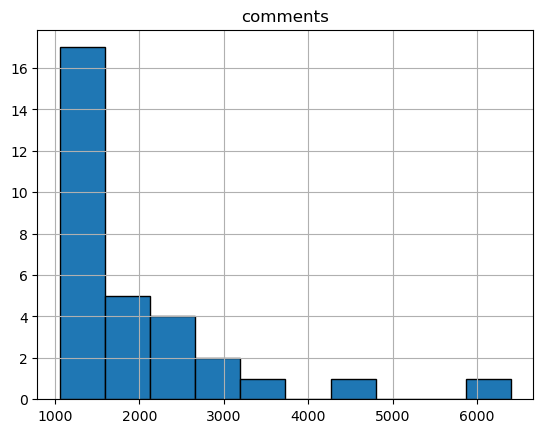

In [11]:
more_informative_comments = dataset[dataset["comments"] > 1000]
more_informative_comments.hist("comments", bins=10, edgecolor='black')

>  Now, before we move on, let's check how many observations we removed from the plot.

In [12]:
before = len(dataset)
after = len(more_informative_comments)
removed = before - after

print(removed)

2519


### Question 4.1. Here's a question for an expansion of your vocabulary: please obtain the above using the query method.

> #### <font color = "red"> Please check the following for more details </font> 
> - `Python Data Science Handbook`
    - *Chapter 3*: Data Manipulation with Pandas
        - *Section 12*: High-Performance Pandas: `eval()` and `query()` 

array([[<Axes: title={'center': 'comments'}>]], dtype=object)

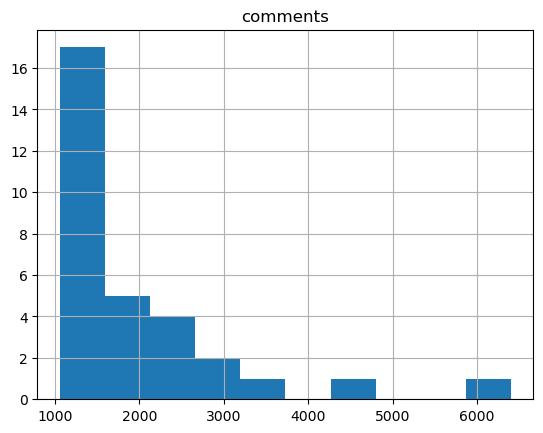

In [13]:
filtered_data = dataset.query('comments > 1000')
filtered_data.hist("comments")

#### Question 4.2. Here's a question for yet another expansion of your vocabulary: please write this using the `loc` accessor.

> #### <font color = "red"> Please check the following for more details on the differences between loc and iloc. 
    
> - `** NOTE: You may ignore ix as it has been deprecated**` </font>

> - `Python Data Science Handbook`
    - *Chapter 3*: Data Manipulation with Pandas
        - *Section 2*: Data Indexing and Selection
            - *Subsection 3*: Indexers: loc, iloc, and ix

array([[<Axes: title={'center': 'comments'}>]], dtype=object)

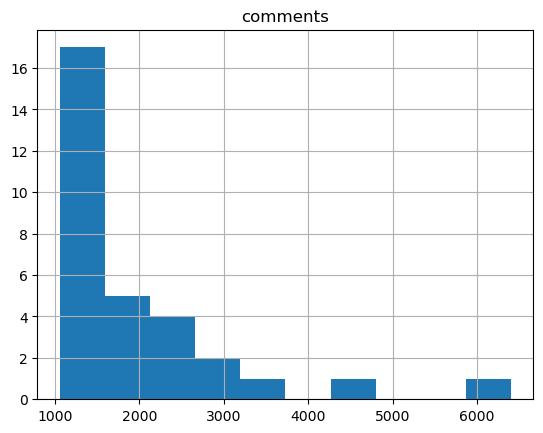

In [14]:
filtered_data = dataset.loc[dataset['comments']>1000]
filtered_data.hist("comments")

> Let's increase the number of bins (intervals) to see more detail.

array([[<Axes: title={'center': 'comments'}>]], dtype=object)

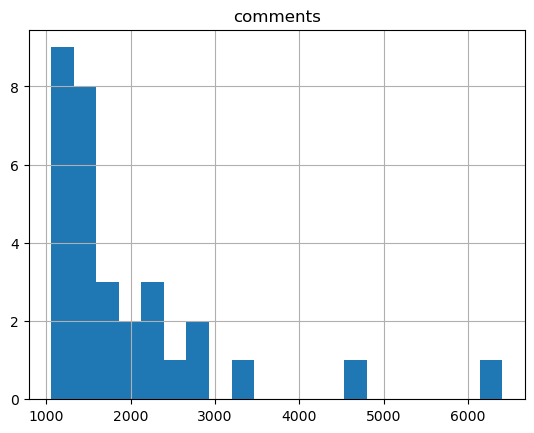

In [15]:
filtered_data = dataset.loc[dataset['comments']>1000]
filtered_data.hist("comments", bins = 20)

#### Question 4.3. Please create a boxplot. Boxplot can also show distributions, but it's far less useful for concentrated distributions because of outliers.

<Axes: >

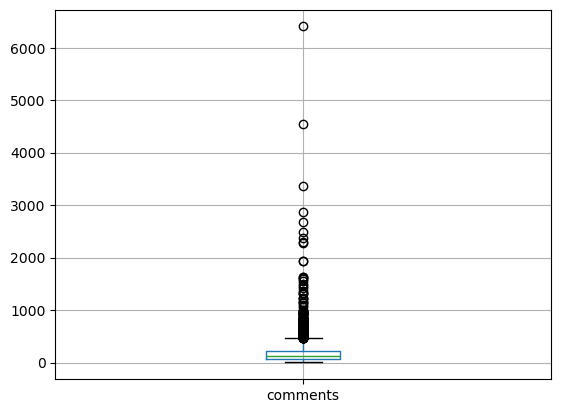

In [16]:
dataset.boxplot("comments")

### <font color = "blue"> Let me reiterate learning pointers in an explicit manner so that you can keep this in mind. </font>

1. `Choose your plot type` based on the question you are answering and the data type(s) you are working with
2. `Use pandas one-liners` to iterate through plots quickly
3. `Try modifying the plot defaults`

> ***Yes, creating plots involves your decision-making***

#### Question 4.4. Please plot the number of talks that took place each year.

> Let's calculate the average delay between filming and publishing.

In [17]:
dataset['delay'] = dataset['published_date'] - dataset['film_date']
avg_delay = dataset['delay'].mean()
print(avg_delay)

21597713.70352941


> Okay. `event` column does not always include the year

> Note that `film_date` denotes `Unix timestamp of the filming`. Have a look at it :)

In [18]:
data = dataset[['film_date']]

> Results don't look right...

> What would you do? You may use `to_datetime()`

In [19]:
dataset['converted_film_date'] = pd.to_datetime(data['film_date'])
dataset['converted_film_date']

0      1970-01-01 00:00:01.140825600
1      1970-01-01 00:00:01.140825600
2      1970-01-01 00:00:01.140739200
3      1970-01-01 00:00:01.140912000
4      1970-01-01 00:00:01.140566400
                    ...             
2545   1970-01-01 00:00:01.496707200
2546   1970-01-01 00:00:01.492992000
2547   1970-01-01 00:00:01.492992000
2548   1970-01-01 00:00:01.499472000
2549   1970-01-01 00:00:01.492992000
Name: converted_film_date, Length: 2550, dtype: datetime64[ns]

> Still, it does NOT look fine...

### <font color = "red"> For your information, [pandas documentation for `to_datetime`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html) </font>

> #### <font color = "blue"> Please use argument `unit` and set it at `"s"` </font>

In [20]:
dataset['converted_film_date'] = pd.to_datetime(dataset['film_date'] , unit = 's')
dataset['converted_film_date']

0      2006-02-25
1      2006-02-25
2      2006-02-24
3      2006-02-26
4      2006-02-22
          ...    
2545   2017-06-06
2546   2017-04-24
2547   2017-04-24
2548   2017-07-08
2549   2017-04-24
Name: converted_film_date, Length: 2550, dtype: datetime64[ns]

> You might want to check that event name matches film_datetime for a random sample: use, `sample()`

In [21]:
dataset.sample()[['event','converted_film_date']]

,event,converted_film_date
846,TEDSalon London 2010,2010-11-11


> New column uses the datetime data type (this was an automatic conversion)

##### `datetime` columns have convenient attributes under the `dt` namespace

In [22]:
dataset['year'] = dataset['converted_film_date'].dt.year
dataset['year']

0       2006
1       2006
2       2006
3       2006
4       2006
        ... 
2545    2017
2546    2017
2547    2017
2548    2017
2549    2017
Name: year, Length: 2550, dtype: int32

> This is similar to string methods under the str namespace

In [23]:
dataset['year'] = str(dataset['converted_film_date'])
dataset['year']

0       0      2006-02-25\n1      2006-02-25\n2      2...
1       0      2006-02-25\n1      2006-02-25\n2      2...
2       0      2006-02-25\n1      2006-02-25\n2      2...
3       0      2006-02-25\n1      2006-02-25\n2      2...
4       0      2006-02-25\n1      2006-02-25\n2      2...
                              ...                        
2545    0      2006-02-25\n1      2006-02-25\n2      2...
2546    0      2006-02-25\n1      2006-02-25\n2      2...
2547    0      2006-02-25\n1      2006-02-25\n2      2...
2548    0      2006-02-25\n1      2006-02-25\n2      2...
2549    0      2006-02-25\n1      2006-02-25\n2      2...
Name: year, Length: 2550, dtype: object

> Let's count the number of talks each year using value_counts()

In [24]:
talks_per_year = dataset['year'].value_counts()

##### Let's visualize.

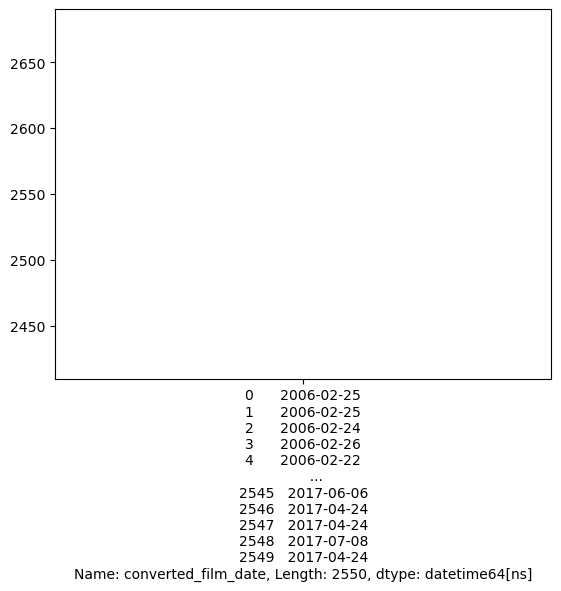

In [25]:
plt.plot(talks_per_year.index, talks_per_year.values)

> points are plotted and connected in the order you give them to pandas

#### Question 4.5. Please sort the index before plotting

In [26]:
talks_per_year = dataset['converted_film_date'].dt.year.value_counts().sort_index()
talks_per_year

converted_film_date
1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: count, dtype: int64

> Check your data to understand more about what this means :)

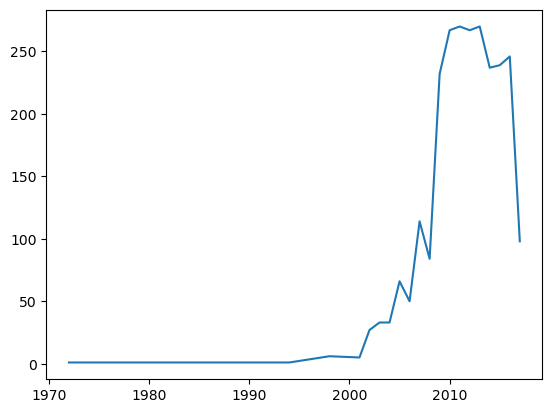

In [27]:
plt.plot(talks_per_year.index, talks_per_year.values)

> Do note that we only have partial data for 2017

Before we move forward, please consider the following:

- Read the documentation of your dataset
- Use the datetime data type for dates and times
- Check your work as you proceed
- Exclude data if it might not be relevant to your focal point of analysis

### Question 5.1. What were the "best" events in TED talks' history to attend? Let's count the number of talks (great if you value variety, but they may not be great talks)

In [28]:
talks_per_event = dataset['event'].value_counts()
#display(talks_per_event)

#### Question 5.2. Let's use `views` as a proxy for `quality of talk`

In [29]:
avg_views_per_event = dataset.groupby('event')['views'].mean()
#avg_views_per_event

#### Question 5.3. Let's find the largest values, but we don't know how many talks are being averaged

In [30]:
top_events = avg_views_per_event.nlargest(5)
#top_events

#### Question 5.4. Let's show the number of talks along with the mean (events with the highest means had only 1 or 2 talks)

In [32]:
event_stats = dataset.groupby('event')['views'].agg(['count','mean'])
event_stats_sorted = event_stats.sort_values(by = 'mean', ascending = False)

#### Question 5.5. Let's calculate the total views per event

In [33]:
total_views_per_event = dataset.groupby('event')['views'].sum().sort_values(ascending = False)

> #### <font color = "blue"> As you have seen, please... </font>

- Think creatively for how you can use the data you have to answer your question
- Watch out for small sample sizes

### Now, let's take a look at ratings data

> Previously, users could tag talks on the TED website (funny, inspiring, confusing, etc.)

In [70]:
dataset[['ratings']]

,ratings
0,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {..."
1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i..."
2,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i..."
3,"[{'id': 3, 'name': 'Courageous', 'count': 760}..."
4,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}..."
...,...
2545,"[{'id': 3, 'name': 'Courageous', 'count': 24},..."
2546,"[{'id': 22, 'name': 'Fascinating', 'count': 32..."
2547,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ..."
2548,"[{'id': 11, 'name': 'Longwinded', 'count': 3},..."


> Think about two ways to examine the ratings data for the first talk

In [71]:
dataset['ratings'][0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

> Okay, this is a string not a list.

In [79]:
eval(dataset['ratings'][0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

### Let's convert this into something useful using Python's `ast` module (`Abstract Syntax Tree`)

> `literal_eval()` allows you to evaluate a string containing a Python literal or container

> #### <font color = "red"> See below for my guidance </font>

```python
# if you wish to unpack data
    YOUR_DF["variable"].apply(ast.literal_eval)

# if you wish to access specific talk related data
    YOUR_DF["variable"].apply(ast.literal_eval)[0]

# if you wish to access specific talk related observations within the data
    YOUR_DF["variable"].apply(ast.literal_eval)[0][0]

# if you wish to access specific talk related observations with a particular attribute within the data
    YOUR_DF["variable"].apply(ast.literal_eval)[0][0]["key"]
```

> If you have a string representation of something, you can retrieve what it actually represents

> Let's unpack the ratings data for the first talk

In [80]:
import ast
dataset["ratings"].apply(ast.literal_eval)[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

> Yes, now we have a list (of dictionaries)

### Question 6. Let's define a function to convert an element in the ratings Series from string to list

#### <font color = "blue"> USE `ast.literal_eval()` </font>

In [82]:
def convert(n,column_no):
    first_row = n[column_no].apply(ast.literal_eval)[0]
    return first_row

> Let's test our function

In [83]:
ratings_1 = convert(dataset,"ratings")
ratings_1

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

> Note that Series `apply` method applies a function to every element in a Series, returning a Series.

> #### <font color = "blue"> `lambda` is a shorter alternative</blue>

> #### <font color = "red">Please check the following for more details</font>
> - `Coder's Apprentice`
    - *Chapter 8*: Functions
        - *Section 6*: Anonymous functions

> An even shorter alternative is to apply the function directly (without lambda)

> Let's check that the new Series looks as expected

> Each element in the Series is a list

> data type of the new Series is object

##### Note that object is not just for strings.

#### <font color = "blue"> So far so good, remember to: </font>

- Pay attention to data types in pandas
- Use apply any time it is necessary

### Question 7.1. Let's have a look at the total number of ratings received by each talk

- for each talk, calculate the percentage of ratings that were negative

- for each talk, calculate the average number of ratings it received per day since it was published

> Let's start by building a simple function

> Here, expected result (for each talk) is sum of count

#### Question 7.2. Please pass it a list, and it returns the first element in the list, which is a dictionary

#### Question 7.3. Let's modify the function to return the vote count.

#### Quesion 7.4. Let's pass it a list, and it returns a value from the first dictionary in the list

#### Question 7.5. Let's modify the function to get the sum of count

> Does the result look about right? Please check.

> Let's apply it to every element in the Series

> #### <font color = "blue"> Alternative here is to use a `generator expression`</font>

> #### <font color = "red"> Please check the following for more details </font>
> - `Think Python`: https://greenteapress.com/thinkpython2/thinkpython2.pdf
    - *Chapter 19*: The Goodies
        - *Section 3*: Generator expressions

> Try to use `lambda` to apply this method

> Another alternative is to use `pd.DataFrame()`

> use `lambda` to apply this method

> Things to consider:

- Write your code in small chunks

- Check your work as you move forward

- `lambda` is best for simple functions

### Let's find: 
#### ***which occupations deliver the funniest TED talks on average?***

- for each talk, calculate the most frequent rating
- for each talk, clean the occupation data so that there's only one occupation per talk

##### You might want to count the number of funny ratings

> "Funny" is not always the first dictionary in the list.

#### Please check ratings (not ratings_list) to see if "Funny" is always a rating type

### Question 8. Let's write a custom function that gives us a `dictionary` that lists `talks` containing `funny` rating.

> Then, you might want to examine a record in which "Funny" is not the first dictionary

> Let's check that the function works.

> Let's apply it to every element in the Series.

> Do check for `missing values`.

##### Now, let's calculate the percentage of ratings that are funny

> Let's do some "gut check" here that this calculation makes sense by examining the occupations of the funniest talks

> Let's examine the occupations of the least funny talks.

### Question 9. It would be funny (pun inteded here) to analyze the funny rate by occupation :) Let's calculate the mean funny rate for each job.

##### Note that most of the occupations have a sample size of 1

### Question 10. Let's start looking at `occupations` that are well-represented in the dataset. Let's count how many times each job appears

##### `value_counts()` outputs a pandas Series, thus we can use pandas to manipulate the output

##### Let's take a look at jobs which appear at least 5 times

> Let's save the index of this Series

##### Now, re-analyze the funny rate by occupation (for top jobs only)

> Let's filter DataFrame to include only those jobs.

##### Let's re-do the previous groupby

> ### <font color = "blue"> Please consider the following, when using `pandas`: </font>

- Check your assumptions about your data
- Check whether your results are reasonable
- Take advantage of the fact that pandas operations often output a DataFrame or a Series
- Watch out for small sample sizes
- Consider the impact of missing data

> ### <font color = "blue"> As you could find from me as well as from the dataset, `data scientists are relatively funny` :) </font>


### <font color="green">"Thank you for putting your efforts into the exercise problem sets 😊"</font>